# Objective

Predict the water point functionality status at a location (those which might fail) based on features like 'Amount of water', 'Gps height', 'quantity', 'region', 'source'.
Train dataset has 44068 observations with 34 features.


In [1]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Training Data
water_point_train = pd.read_csv( 'train-1541136939101.csv')
# Test Data
water_point_test = pd.read_csv('test-1541136939101.csv')
# Training Target Data
water_point_target = pd.read_csv('trainlabels-1541136939101.csv')

In [4]:
# shape of train, train target and test data
print('Training data shape: ', water_point_train.shape)
print('Training target data shape: ', water_point_target.shape)
print('Testing data shape: ', water_point_test.shape)


Training data shape:  (44068, 34)
Training target data shape:  (44068, 2)
Testing data shape:  (11015, 34)


In [5]:
# Explore the data
water_point_train.head()

,Id,Amount_of_water,Gps_height,Waterpointname,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
0,56421,0.0,1555,waterpoint7693,hand pump,basin3,village8556,region4,15,ward500,...,never pay,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump
1,21324,500.0,857,waterpoint3061,communal standpipe multiple,basin7,village7372,region5,10,ward1800,...,pay monthly,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe
2,74,0.0,0,waterpoint254,communal standpipe,basin1,village9460,region6,17,ward883,...,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe
3,74038,0.0,0,waterpoint33415,other,basin5,village13878,region13,18,ward1505,...,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other
4,29929,0.0,0,waterpoint4342,hand pump,basin4,village5192,region6,14,ward942,...,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump


In [6]:
water_point_target.head()

,id,Status
0,63000,functional
1,10454,functional
2,71993,functional
3,22429,non functional
4,63518,non functional


In [7]:
water_point_test.head()

,Id,Amount_of_water,Gps_height,Waterpointname,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
0,31547,0.0,1018,waterpoint8037,hand pump,basin2,village4319,region5,10,ward1777,...,pay when scheme fails,on failure,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump
1,34980,0.0,356,waterpoint4767,hand pump,basin8,village2412,region5,10,ward493,...,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump
2,54744,500.0,265,waterpoint32855,hand pump,basin7,village19173,region2,5,ward1546,...,pay monthly,monthly,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump
3,20884,0.0,1203,waterpoint23827,communal standpipe multiple,basin5,village1692,region18,20,ward643,...,unknown,unknown,soft,good,enough,enough,lake,river/lake,surface,communal standpipe
4,42440,0.0,0,waterpoint19001,communal standpipe,basin2,village17574,region19,12,ward1356,...,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe


#### Merging train data (features) and train labels (target)

In [8]:
# Creating copies of the original files for back up
water_point_train_copy = water_point_train.copy()
water_point_test_copy = water_point_test.copy()

In [9]:
# merge
water_point_train_copy = pd.merge(left= water_point_train_copy, right = water_point_target, left_on='Id', right_on='id',how='inner')

In [10]:
water_point_train_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44068 entries, 0 to 44067
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     44068 non-null  int64  
 1   Amount_of_water        44068 non-null  float64
 2   Gps_height             44068 non-null  int64  
 3   Waterpointname         44068 non-null  object 
 4   Waterpoint_type        44068 non-null  object 
 5   Basin_name             44068 non-null  object 
 6   Village                44068 non-null  object 
 7   Regionname             44068 non-null  object 
 8   Region_code            44068 non-null  int64  
 9   Wardname               44068 non-null  object 
 10  District_code          44068 non-null  int64  
 11  Population             44068 non-null  int64  
 12  Public_meeting         41543 non-null  object 
 13  Organization_funding   41468 non-null  object 
 14  Organization_surveyed  44068 non-null  object 
 15  Sc

In [11]:

### Removing the second 'id' column as both Id and id are same

water_point_train_copy.drop(['id'], axis = 1, inplace=True)

In [12]:
water_point_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44068 entries, 0 to 44067
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     44068 non-null  int64  
 1   Amount_of_water        44068 non-null  float64
 2   Gps_height             44068 non-null  int64  
 3   Waterpointname         44068 non-null  object 
 4   Waterpoint_type        44068 non-null  object 
 5   Basin_name             44068 non-null  object 
 6   Village                44068 non-null  object 
 7   Regionname             44068 non-null  object 
 8   Region_code            44068 non-null  int64  
 9   Wardname               44068 non-null  object 
 10  District_code          44068 non-null  int64  
 11  Population             44068 non-null  int64  
 12  Public_meeting         41543 non-null  object 
 13  Organization_funding   41468 non-null  object 
 14  Organization_surveyed  44068 non-null  object 
 15  Sc

# EDA

In [13]:
# Check data types
water_point_train_copy.dtypes

Id                         int64
Amount_of_water          float64
Gps_height                 int64
Waterpointname            object
Waterpoint_type           object
Basin_name                object
Village                   object
Regionname                object
Region_code                int64
Wardname                  object
District_code              int64
Population                 int64
Public_meeting            object
Organization_funding      object
Organization_surveyed     object
Scheme_management         object
SchemeName                object
Permit                    object
Company_installed         object
Management                object
Management_group          object
Extraction_type           object
Extraction_type_group     object
Extraction_type_class     object
Payment                   object
Payment_type              object
Water_quality             object
Quality_group             object
Quantity                  object
Quantity_group            object
Source    

In [14]:
## Printing initial memory usage
memory = water_point_train_copy.memory_usage()
print(memory)
print("Total Memory Usage = ",sum(memory))

Index                    352544
Id                       352544
Amount_of_water          352544
Gps_height               352544
Waterpointname           352544
Waterpoint_type          352544
Basin_name               352544
Village                  352544
Regionname               352544
Region_code              352544
Wardname                 352544
District_code            352544
Population               352544
Public_meeting           352544
Organization_funding     352544
Organization_surveyed    352544
Scheme_management        352544
SchemeName               352544
Permit                   352544
Company_installed        352544
Management               352544
Management_group         352544
Extraction_type          352544
Extraction_type_group    352544
Extraction_type_class    352544
Payment                  352544
Payment_type             352544
Water_quality            352544
Quality_group            352544
Quantity                 352544
Quantity_group           352544
Source  

In [15]:
# Function that helps in datatype change to reduce memory usage 
def downcast_dtypes(df):
    '''
        Changes column types in the dataframe: 
                
                `float64` type to `float32`
                `int64`   type to `int16`
    '''
    
    # Select columns to downcast
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols =   [c for c in df if df[c].dtype == "int64"]
    
    # Downcast
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols]   = df[int_cols].astype(np.int16)
    
    return df

In [16]:
downcast_dtypes(water_point_train_copy)


,Id,Amount_of_water,Gps_height,Waterpointname,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
0,-9115,0.0,1555,waterpoint7693,hand pump,basin3,village8556,region4,15,ward500,...,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,non functional
1,21324,500.0,857,waterpoint3061,communal standpipe multiple,basin7,village7372,region5,10,ward1800,...,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,non functional
2,74,0.0,0,waterpoint254,communal standpipe,basin1,village9460,region6,17,ward883,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,non functional
3,8502,0.0,0,waterpoint33415,other,basin5,village13878,region13,18,ward1505,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,non functional
4,29929,0.0,0,waterpoint4342,hand pump,basin4,village5192,region6,14,ward942,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44063,-31981,0.0,0,waterpoint14185,improved spring,basin5,village16282,region13,18,ward1422,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,improved spring,functional
44064,17775,0.0,618,waterpoint8315,hand pump,basin8,village10061,region5,10,ward2060,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,non functional
44065,-31336,0.0,1582,waterpoint24393,communal standpipe,basin7,village9791,region12,11,ward1897,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,non functional
44066,17012,200.0,629,waterpoint23566,communal standpipe,basin6,village12243,region15,3,ward1248,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,functional


In [17]:
# memory reduced now

memory = water_point_train_copy.memory_usage()
print(memory)
print("Total Memory Usage = ",sum(memory))

Index                    352544
Id                        88136
Amount_of_water          176272
Gps_height                88136
Waterpointname           352544
Waterpoint_type          352544
Basin_name               352544
Village                  352544
Regionname               352544
Region_code               88136
Wardname                 352544
District_code             88136
Population                88136
Public_meeting           352544
Organization_funding     352544
Organization_surveyed    352544
Scheme_management        352544
SchemeName               352544
Permit                   352544
Company_installed        352544
Management               352544
Management_group         352544
Extraction_type          352544
Extraction_type_group    352544
Extraction_type_class    352544
Payment                  352544
Payment_type             352544
Water_quality            352544
Quality_group            352544
Quantity                 352544
Quantity_group           352544
Source  

In [18]:
downcast_dtypes(water_point_test_copy)


,Id,Amount_of_water,Gps_height,Waterpointname,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
0,31547,0.0,1018,waterpoint8037,hand pump,basin2,village4319,region5,10,ward1777,...,pay when scheme fails,on failure,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump
1,-30556,0.0,356,waterpoint4767,hand pump,basin8,village2412,region5,10,ward493,...,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump
2,-10792,500.0,265,waterpoint32855,hand pump,basin7,village19173,region2,5,ward1546,...,pay monthly,monthly,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump
3,20884,0.0,1203,waterpoint23827,communal standpipe multiple,basin5,village1692,region18,20,ward643,...,unknown,unknown,soft,good,enough,enough,lake,river/lake,surface,communal standpipe
4,-23096,0.0,0,waterpoint19001,communal standpipe,basin2,village17574,region19,12,ward1356,...,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,-14718,0.0,0,waterpoint34525,communal standpipe,basin1,village18251,region11,1,ward1020,...,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe
11011,-7058,0.0,1408,waterpoint5530,communal standpipe,basin2,village2038,region12,11,ward1796,...,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe
11012,-13617,0.0,0,waterpoint12171,communal standpipe,basin7,village17251,region19,12,ward1342,...,pay when scheme fails,on failure,soft,good,enough,enough,river,river/lake,surface,communal standpipe
11013,4475,0.0,0,waterpoint13657,communal standpipe,basin4,village13480,region8,14,ward1311,...,never pay,never pay,soft,good,enough,enough,dam,dam,surface,communal standpipe


In [19]:
water_point_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44068 entries, 0 to 44067
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     44068 non-null  int16  
 1   Amount_of_water        44068 non-null  float32
 2   Gps_height             44068 non-null  int16  
 3   Waterpointname         44068 non-null  object 
 4   Waterpoint_type        44068 non-null  object 
 5   Basin_name             44068 non-null  object 
 6   Village                44068 non-null  object 
 7   Regionname             44068 non-null  object 
 8   Region_code            44068 non-null  int16  
 9   Wardname               44068 non-null  object 
 10  District_code          44068 non-null  int16  
 11  Population             44068 non-null  int16  
 12  Public_meeting         41543 non-null  object 
 13  Organization_funding   41468 non-null  object 
 14  Organization_surveyed  44068 non-null  object 
 15  Sc

In [20]:
water_point_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11015 entries, 0 to 11014
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     11015 non-null  int16  
 1   Amount_of_water        11015 non-null  float32
 2   Gps_height             11015 non-null  int16  
 3   Waterpointname         11015 non-null  object 
 4   Waterpoint_type        11015 non-null  object 
 5   Basin_name             11015 non-null  object 
 6   Village                11015 non-null  object 
 7   Regionname             11015 non-null  object 
 8   Region_code            11015 non-null  int16  
 9   Wardname               11015 non-null  object 
 10  District_code          11015 non-null  int16  
 11  Population             11015 non-null  int16  
 12  Public_meeting         10362 non-null  object 
 13  Organization_funding   11015 non-null  object 
 14  Organization_surveyed  11015 non-null  object 
 15  Sc

In [21]:
# different waterpoint_names
print(water_point_train_copy['Waterpointname'].value_counts())
print(water_point_test_copy['Waterpointname'].value_counts())


waterpoint5530     2831
waterpoint8315     1272
waterpoint9815      622
waterpoint36768     384
waterpoint14626     226
                   ... 
waterpoint23895       1
waterpoint27955       1
waterpoint9435        1
waterpoint15469       1
waterpoint5008        1
Name: Waterpointname, Length: 28693, dtype: int64
waterpoint5530     656
waterpoint8315     333
waterpoint9815     130
waterpoint36768    107
waterpoint14626     76
                  ... 
waterpoint10283      1
waterpoint22180      1
waterpoint23552      1
waterpoint31037      1
waterpoint10150      1
Name: Waterpointname, Length: 8136, dtype: int64


In [22]:
# # different waterpoint_types
print(water_point_train_copy['Waterpoint_type'].value_counts())
print(water_point_test_copy['Waterpoint_type'].value_counts())


communal standpipe             21085
hand pump                      13197
other                           4809
communal standpipe multiple     4316
improved spring                  555
cattle trough                     99
dam                                7
Name: Waterpoint_type, dtype: int64
communal standpipe             5177
hand pump                      3262
other                          1278
communal standpipe multiple    1139
improved spring                 144
cattle trough                    15
Name: Waterpoint_type, dtype: int64


In [23]:
# different basin_names
print(water_point_train_copy['Basin_name'].value_counts())
print(water_point_test_copy['Basin_name'].value_counts())

basin5    7397
basin6    6728
basin7    6080
basin1    5770
basin9    4578
basin4    4526
basin2    3890
basin8    3308
basin3    1791
Name: Basin_name, dtype: int64
basin5    1862
basin6    1735
basin7    1459
basin1    1458
basin4    1164
basin9    1140
basin2     945
basin8     859
basin3     393
Name: Basin_name, dtype: int64


In [24]:
# different villages
print(water_point_train_copy['Village'].value_counts())
print(water_point_test_copy['Village'].value_counts())


village18166    382
village8556     373
village17891    361
village1        289
village14666    257
               ... 
village2321       1
village256        1
village9916       1
village1402       1
village8341       1
Name: Village, Length: 16471, dtype: int64
village17891    104
village8556      89
village18166     84
village1         81
village14666     73
               ... 
village5277       1
village7941       1
village1733       1
village1664       1
village7999       1
Name: Village, Length: 6726, dtype: int64


In [25]:
# Number of unique classes in each object column
water_point_train_copy.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


Waterpointname           28693
Waterpoint_type              7
Basin_name                   9
Village                  16471
Regionname                  21
Wardname                  2087
Public_meeting               2
Organization_funding      2380
Organization_surveyed        1
Scheme_management           12
SchemeName                2505
Permit                       2
Company_installed         1873
Management                  12
Management_group             5
Extraction_type             18
Extraction_type_group       13
Extraction_type_class        7
Payment                      7
Payment_type                 7
Water_quality                8
Quality_group                6
Quantity                     5
Quantity_group               5
Source                      10
Source_type                  7
Source_class                 3
Waterpoint_type_group        6
Status                       2
dtype: int64

In [26]:
#Number of unique classes in each object column
water_point_test_copy.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


Waterpointname           8136
Waterpoint_type             6
Basin_name                  9
Village                  6726
Regionname                 21
Wardname                 1879
Public_meeting              2
Organization_funding     1216
Organization_surveyed       1
Scheme_management          11
SchemeName               1578
Permit                      2
Company_installed        1233
Management                 12
Management_group            5
Extraction_type            18
Extraction_type_group      13
Extraction_type_class       7
Payment                     7
Payment_type                7
Water_quality               8
Quality_group               6
Quantity                    5
Quantity_group              5
Source                     10
Source_type                 7
Source_class                3
Waterpoint_type_group       5
dtype: int64

In [27]:
# different region names
print(water_point_train_copy['Regionname'].value_counts())
print(water_point_test_copy['Regionname'].value_counts())

region12    4190
region6     3435
region19    3357
region15    3218
region2     2982
region1     2547
region13    2390
region21    2323
region3     2092
region5     1984
region9     1977
region14    1766
region11    1572
region7     1570
region18    1548
region8     1535
region4     1357
region20    1257
region17    1172
region16    1150
region10     646
Name: Regionname, dtype: int64
region12    981
region6     912
region15    839
region19    778
region2     724
region1     628
region13    622
region21    596
region3     507
region9     497
region5     492
region14    447
region11    420
region7     395
region8     379
region18    361
region20    347
region4     316
region17    315
region16    303
region10    156
Name: Regionname, dtype: int64


In [28]:
# different wardnames
water_point_train_copy['Wardname'].value_counts()

ward1290    240
ward1346    209
ward823     184
ward550     167
ward2063    166
           ... 
ward70        1
ward1769      1
ward250       1
ward959       1
ward66        1
Name: Wardname, Length: 2087, dtype: int64

In [29]:
# publicmeeting value_counts
water_point_train_copy['Public_meeting'].value_counts()

True     37800
False     3743
Name: Public_meeting, dtype: int64

In [30]:
# Organization_funding value_counts
water_point_train_copy['Organization_funding'].value_counts()

Iorg1388    5246
Org_1409    4636
Org_1233    1411
Org_1460    1049
Org_970      687
            ... 
Org_121        1
Iorg151        1
Org_291        1
Iorg1513       1
Org_1558       1
Name: Organization_funding, Length: 2380, dtype: int64

In [31]:
# Organization_surveyed value_counts
water_point_train_copy['Organization_surveyed'].value_counts()

# same for all observations. So this column can be dropped.

DataConsultantLtd    44068
Name: Organization_surveyed, dtype: int64

In [32]:
# Scheme_management value_counts
print(water_point_train_copy['Scheme_management'].value_counts())
print(water_point_test_copy['Scheme_management'].value_counts())


VWC                 27563
WUG                  3591
Water authority      2160
WUA                  2143
Water Board          2113
Parastatal           1207
Private operator      839
Company               797
Other                 598
SWC                    76
Trust                  50
None                    1
Name: Scheme_management, dtype: int64
VWC                 6896
WUG                  943
Water authority      545
Water Board          524
WUA                  501
Parastatal           271
Company              227
Private operator     201
Other                146
SWC                   20
Trust                 17
Name: Scheme_management, dtype: int64


In [33]:
# SchemeName value counts
water_point_train_copy['SchemeName'].value_counts()

SCM425     485
SCM1550    451
SCM115     421
SCM1202    325
SCM1262    298
          ... 
SCM2319      1
SCM366       1
SCM1423      1
SCM583       1
SCM1050      1
Name: SchemeName, Length: 2505, dtype: int64

In [34]:
# Permit value_counts
water_point_train_copy['Permit'].value_counts()

True     28970
False    12871
Name: Permit, dtype: int64

In [35]:
# Company_installed value counts
water_point_train_copy['Company_installed'].value_counts()

Iorg1388    12659
Iorg1510     1275
Iorg504       855
Iorg1256      832
Iorg1310      786
            ...  
Iorg1141        1
Iorg728         1
Iorg1941        1
Iorg465         1
Iorg721         1
Name: Company_installed, Length: 1873, dtype: int64

In [36]:
# Management value-counts

print(water_point_train_copy['Management'].value_counts())
print(water_point_test_copy['Management'].value_counts())


vwc                 30173
wug                  4659
water board          2140
wua                  1893
private operator     1555
parastatal           1267
water authority       684
other                 632
company               513
unknown               421
other - school         76
trust                  55
Name: Management, dtype: int64
vwc                 7543
wug                 1211
water board          528
wua                  437
private operator     372
parastatal           290
water authority      168
company              157
other                157
unknown              113
other - school        22
trust                 17
Name: Management, dtype: int64


In [37]:
# Management_group value_counts
print(water_point_train_copy['Management_group'].value_counts())
print(water_point_test_copy['Management_group'].value_counts())


user-group    38865
commercial     2807
parastatal     1267
other           708
unknown         421
Name: Management_group, dtype: int64
user-group    9719
commercial     714
parastatal     290
other          179
unknown        113
Name: Management_group, dtype: int64


In [38]:
# Extraction_type value_counts
print(water_point_train_copy['Extraction_type'].value_counts())
print(water_point_test_copy['Extraction_type'].value_counts())


gravity                      19302
nira/tanira                   5963
other                         4954
submersible                   3646
swn 80                        2823
mono                          2165
india mark ii                 1867
afridev                       1383
ksb                           1096
other - rope pump              352
other - swn 81                 175
windmill                        87
india mark iii                  77
other - play pump               66
cemo                            61
walimi                          26
climax                          24
other - mkulima/shinyanga        1
Name: Extraction_type, dtype: int64
gravity                      4777
nira/tanira                  1550
other                        1270
submersible                   891
swn 80                        635
mono                          571
india mark ii                 454
afridev                       345
ksb                           293
other - rope pump           

In [39]:
# Extraction_type_group value_counts
print(water_point_train_copy['Extraction_type_group'].value_counts())
print(water_point_test_copy['Extraction_type_group'].value_counts())

gravity            19302
nira/tanira         5963
other               4954
submersible         4742
swn 80              2823
mono                2165
india mark ii       1867
afridev             1383
rope pump            352
other handpump       268
wind-powered          87
other motorpump       85
india mark iii        77
Name: Extraction_type_group, dtype: int64
gravity            4777
nira/tanira        1550
other              1270
submersible        1184
swn 80              635
mono                571
india mark ii       454
afridev             345
rope pump            82
other handpump       76
other motorpump      28
wind-powered         23
india mark iii       20
Name: Extraction_type_group, dtype: int64


In [40]:
print(water_point_train_copy['Extraction_type_class'].value_counts())
print(water_point_test_copy['Extraction_type_class'].value_counts())

gravity         19302
handpump        12381
other            4954
submersible      4742
motorpump        2250
rope pump         352
wind-powered       87
Name: Extraction_type_class, dtype: int64
gravity         4777
handpump        3080
other           1270
submersible     1184
motorpump        599
rope pump         82
wind-powered      23
Name: Extraction_type_class, dtype: int64


In [41]:
print(water_point_train_copy['Payment'].value_counts())
print(water_point_test_copy['Payment'].value_counts())


never pay                18752
pay per bucket            6826
unknown                   6124
pay monthly               5950
pay when scheme fails     2929
pay annually              2740
other                      747
Name: Payment, dtype: int64
never pay                4689
pay per bucket           1750
unknown                  1601
pay monthly              1423
pay when scheme fails     708
pay annually              655
other                     189
Name: Payment, dtype: int64


In [42]:
print(water_point_train_copy['Payment_type'].value_counts())
print(water_point_test_copy['Payment_type'].value_counts())


never pay     18752
per bucket     6826
unknown        6124
monthly        5950
on failure     2929
annually       2740
other           747
Name: Payment_type, dtype: int64
never pay     4689
per bucket    1750
unknown       1601
monthly       1423
on failure     708
annually       655
other          189
Name: Payment_type, dtype: int64


In [43]:
print(water_point_train_copy['Water_quality'].value_counts())
print(water_point_test_copy['Water_quality'].value_counts())

soft                  37551
salty                  3700
unknown                1445
milky                   633
coloured                358
salty abandoned         211
fluoride                154
fluoride abandoned       16
Name: Water_quality, dtype: int64
soft                  9363
salty                  931
unknown                396
milky                  157
coloured                78
salty abandoned         56
fluoride                33
fluoride abandoned       1
Name: Water_quality, dtype: int64


In [44]:
print(water_point_train_copy['Quality_group'].value_counts())
print(water_point_test_copy['Quality_group'].value_counts())


good        37551
salty        3911
unknown      1445
milky         633
colored       358
fluoride      170
Name: Quality_group, dtype: int64
good        9363
salty        987
unknown      396
milky        157
colored       78
fluoride      34
Name: Quality_group, dtype: int64


In [45]:
print(water_point_train_copy['Quantity'].value_counts())
print(water_point_test_copy['Quantity'].value_counts())


enough          24610
insufficient    10982
dry              4943
seasonal         2930
unknown           603
Name: Quantity, dtype: int64
enough          6176
insufficient    2697
dry             1266
seasonal         704
unknown          172
Name: Quantity, dtype: int64


In [46]:
print(water_point_train_copy['Quantity_group'].value_counts())
print(water_point_test_copy['Quantity_group'].value_counts())


enough          24610
insufficient    10982
dry              4943
seasonal         2930
unknown           603
Name: Quantity_group, dtype: int64
enough          6176
insufficient    2697
dry             1266
seasonal         704
unknown          172
Name: Quantity_group, dtype: int64


In [47]:
print(water_point_train_copy['Source'].value_counts())
print(water_point_test_copy['Source'].value_counts())


shallow well            12617
spring                  12611
machine dbh              8456
river                    6732
rainwater harvesting     1602
hand dtw                  700
lake                      609
dam                       522
other                     169
unknown                    50
Name: Source, dtype: int64
shallow well            3250
spring                  3134
machine dbh             2128
river                   1659
rainwater harvesting     379
hand dtw                 157
lake                     144
dam                      110
other                     42
unknown                   12
Name: Source, dtype: int64


In [48]:
print(water_point_train_copy['Source_type'].value_counts())
print(water_point_test_copy['Source_type'].value_counts())

shallow well            12617
spring                  12611
borehole                 9156
river/lake               7341
rainwater harvesting     1602
dam                       522
other                     219
Name: Source_type, dtype: int64
shallow well            3250
spring                  3134
borehole                2285
river/lake              1803
rainwater harvesting     379
dam                      110
other                     54
Name: Source_type, dtype: int64


In [49]:
print(water_point_train_copy['Source_class'].value_counts())
print(water_point_test_copy['Source_class'].value_counts())

groundwater    34384
surface         9465
unknown          219
Name: Source_class, dtype: int64
groundwater    8669
surface        2292
unknown          54
Name: Source_class, dtype: int64


In [50]:
print(water_point_train_copy['Waterpoint_type_group'].value_counts())
print(water_point_test_copy['Waterpoint_type_group'].value_counts())


communal standpipe    25401
hand pump             13197
other                  4809
improved spring         555
cattle trough            99
dam                       7
Name: Waterpoint_type_group, dtype: int64
communal standpipe    6316
hand pump             3262
other                 1278
improved spring        144
cattle trough           15
Name: Waterpoint_type_group, dtype: int64


In [51]:
print(water_point_train_copy['Waterpoint_type'].value_counts())
print(water_point_test_copy['Waterpoint_type'].value_counts())


communal standpipe             21085
hand pump                      13197
other                           4809
communal standpipe multiple     4316
improved spring                  555
cattle trough                     99
dam                                7
Name: Waterpoint_type, dtype: int64
communal standpipe             5177
hand pump                      3262
other                          1278
communal standpipe multiple    1139
improved spring                 144
cattle trough                    15
Name: Waterpoint_type, dtype: int64


In [52]:
# test dataset does not have waterpoint_type, waterpoint_type_group as "dam". So those records can be dropped.

Id_index = water_point_train_copy[water_point_train_copy.Waterpoint_type == 'dam'].index.tolist()
water_point_train_copy.drop(index=Id_index, axis=0, inplace=True)

In [53]:
# target value_counts

water_point_train_copy['Status'].value_counts()

functional        25802
non functional    18259
Name: Status, dtype: int64

In [54]:
print(water_point_train_copy['Waterpointname'].value_counts())
print(water_point_test_copy['Waterpointname'].value_counts())

waterpoint5530     2831
waterpoint8315     1272
waterpoint9815      622
waterpoint36768     384
waterpoint14626     226
                   ... 
waterpoint23895       1
waterpoint27955       1
waterpoint9435        1
waterpoint15469       1
waterpoint5008        1
Name: Waterpointname, Length: 28692, dtype: int64
waterpoint5530     656
waterpoint8315     333
waterpoint9815     130
waterpoint36768    107
waterpoint14626     76
                  ... 
waterpoint10283      1
waterpoint22180      1
waterpoint23552      1
waterpoint31037      1
waterpoint10150      1
Name: Waterpointname, Length: 8136, dtype: int64


In [55]:
# chi-sqaure test to check the significant dicrete/categorical variables
# If p value significant, then target is considered depenedent on feature.

from scipy.stats import chi2_contingency 

def chi_testing(table, col):
    dep_cols_disc = []
    # chisquare test and captruing the test outputs
    stat, p, dof, expected = chi2_contingency(table) 

    print('\n\t chisquare statistic:', stat)
    print('\n\t p value:', p)

    # Assuming significance level (alpha) as 0.05.    
    signi_level = 0.05

    
    print("\n\tTest Result:")

    if p < signi_level: 
        print('\n\t REJECT NULL Hypothesis: Dependence siginficant \n')
        dep_cols_disc.append(col)
    else: 
        print('\n\t FAIL TO REJECT NULL Hypothesis: Dependence insignificant ie Independent\n')
    return dep_cols_disc


signi_cols_disc = []
catg_col = ['Public_meeting', 'Permit', 'Waterpoint_type_group',
'Management_group', 'Extraction_type_class', 'Payment', 'Source_type',
'Water_quality', 'Quantity']
for col in catg_col:
    table = pd.crosstab(water_point_train_copy[col], water_point_train_copy['Status'])
    print("col name:",col)
    signi_col = chi_testing(table,col)
    signi_cols_disc.extend(signi_col)

col name: Public_meeting

	 chisquare statistic: 231.4557847818931

	 p value: 2.869884782074253e-52

	Test Result:

	 REJECT NULL Hypothesis: Dependence siginficant 

col name: Permit

	 chisquare statistic: 43.838404275087

	 p value: 3.566378611314277e-11

	Test Result:

	 REJECT NULL Hypothesis: Dependence siginficant 

col name: Waterpoint_type_group

	 chisquare statistic: 4586.533892828316

	 p value: 0.0

	Test Result:

	 REJECT NULL Hypothesis: Dependence siginficant 

col name: Management_group

	 chisquare statistic: 107.21824486409145

	 p value: 2.85180053118305e-22

	Test Result:

	 REJECT NULL Hypothesis: Dependence siginficant 

col name: Extraction_type_class

	 chisquare statistic: 4770.551837414559

	 p value: 0.0

	Test Result:

	 REJECT NULL Hypothesis: Dependence siginficant 

col name: Payment

	 chisquare statistic: 2907.952448945619

	 p value: 0.0

	Test Result:

	 REJECT NULL Hypothesis: Dependence siginficant 

col name: Source_type

	 chisquare statistic: 9

# Observations

Based on data observed above, there are several similar columns and few columns that are not important for model building.


1. Waterpoint_type and Waterpoint_type_group are similar
2. Payment and Payment type are similar
3. Water quality and quality group are similar
4. Quantity and Quantity group are similar
5. Source, Source type and Source class are similar
6. Organization_surveyed has only 1 value so there is no variance and it can be dropped
7. Id is all unique values so it can be dropped
8. Management and Management group are similar
9. Village,Wardname,Organization_funding,Scheme_management,Company_installed have too many categories to model. Hence can be dropped.
10. Region code , Regionname are similar. So Regionname can be dropped.

So the repetitive columns in the similar columns will be dropped.

In [56]:
water_point_train_copy.dtypes

Id                         int16
Amount_of_water          float32
Gps_height                 int16
Waterpointname            object
Waterpoint_type           object
Basin_name                object
Village                   object
Regionname                object
Region_code                int16
Wardname                  object
District_code              int16
Population                 int16
Public_meeting            object
Organization_funding      object
Organization_surveyed     object
Scheme_management         object
SchemeName                object
Permit                    object
Company_installed         object
Management                object
Management_group          object
Extraction_type           object
Extraction_type_group     object
Extraction_type_class     object
Payment                   object
Payment_type              object
Water_quality             object
Quality_group             object
Quantity                  object
Quantity_group            object
Source    

In [57]:
# Following are the columns to be dropped
columns_to_drop = ['Id','Waterpoint_type','Payment_type','Quality_group','Source','Source_class',
                   'Organization_surveyed','Waterpointname','Extraction_type_group','Extraction_type',
                   'Management','Quantity_group','SchemeName','Village','Wardname','Organization_funding',
                   'Scheme_management','Company_installed', 'Regionname']
water_point_train_copy.drop(columns_to_drop, axis = 1, inplace=True)
water_point_test_copy.drop(columns_to_drop, axis = 1, inplace=True)

In [58]:
water_point_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44061 entries, 0 to 44067
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Amount_of_water        44061 non-null  float32
 1   Gps_height             44061 non-null  int16  
 2   Basin_name             44061 non-null  object 
 3   Region_code            44061 non-null  int16  
 4   District_code          44061 non-null  int16  
 5   Population             44061 non-null  int16  
 6   Public_meeting         41536 non-null  object 
 7   Permit                 41835 non-null  object 
 8   Management_group       44061 non-null  object 
 9   Extraction_type_class  44061 non-null  object 
 10  Payment                44061 non-null  object 
 11  Water_quality          44061 non-null  object 
 12  Quantity               44061 non-null  object 
 13  Source_type            44061 non-null  object 
 14  Waterpoint_type_group  44061 non-null  object 
 15  St

In [59]:
water_point_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11015 entries, 0 to 11014
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Amount_of_water        11015 non-null  float32
 1   Gps_height             11015 non-null  int16  
 2   Basin_name             11015 non-null  object 
 3   Region_code            11015 non-null  int16  
 4   District_code          11015 non-null  int16  
 5   Population             11015 non-null  int16  
 6   Public_meeting         10362 non-null  object 
 7   Permit                 10486 non-null  object 
 8   Management_group       11015 non-null  object 
 9   Extraction_type_class  11015 non-null  object 
 10  Payment                11015 non-null  object 
 11  Water_quality          11015 non-null  object 
 12  Quantity               11015 non-null  object 
 13  Source_type            11015 non-null  object 
 14  Waterpoint_type_group  11015 non-null  object 
dtypes:

In [60]:
# Check missing values in train dataset

water_point_train_copy.isnull().sum(axis=0)

Amount_of_water             0
Gps_height                  0
Basin_name                  0
Region_code                 0
District_code               0
Population                  0
Public_meeting           2525
Permit                   2226
Management_group            0
Extraction_type_class       0
Payment                     0
Water_quality               0
Quantity                    0
Source_type                 0
Waterpoint_type_group       0
Status                      0
dtype: int64

In [61]:
# Check missing values in test dataset

water_point_test_copy.isnull().sum(axis=0)

Amount_of_water            0
Gps_height                 0
Basin_name                 0
Region_code                0
District_code              0
Population                 0
Public_meeting           653
Permit                   529
Management_group           0
Extraction_type_class      0
Payment                    0
Water_quality              0
Quantity                   0
Source_type                0
Waterpoint_type_group      0
dtype: int64

In [ ]:
# There are missing values in 2 columns. To be handled.

### Visualizing the target data distribution

<AxesSubplot:xlabel='Status', ylabel='count'>

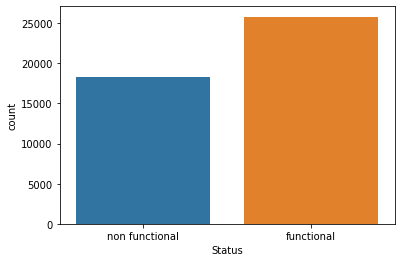

In [62]:
sns.countplot(water_point_train_copy['Status'])

In [63]:
water_point_train_copy['Status'].value_counts(normalize=True)

functional        0.585597
non functional    0.414403
Name: Status, dtype: float64

In [ ]:
# About 59% of the water points are functional while 41% are not functional. So, not an imbalanced dataset.

In [64]:
water_point_train_copy.dtypes

Amount_of_water          float32
Gps_height                 int16
Basin_name                object
Region_code                int16
District_code              int16
Population                 int16
Public_meeting            object
Permit                    object
Management_group          object
Extraction_type_class     object
Payment                   object
Water_quality             object
Quantity                  object
Source_type               object
Waterpoint_type_group     object
Status                    object
dtype: object

In [65]:
# descriptive stats

water_point_train_copy.describe()

,Amount_of_water,Gps_height,Region_code,District_code,Population
count,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000
mean,329.834015,674.366356,15.226118,5.664284,179.679354
std,3127.850098,698.069308,17.567610,9.671328,473.464075
min,0.000000,-63.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,2.000000,0.000000
50%,0.000000,370.000000,12.000000,3.000000,25.000000
75%,20.000000,1327.000000,17.000000,5.000000,210.000000
max,350000.000000,2628.000000,99.000000,80.000000,30500.000000


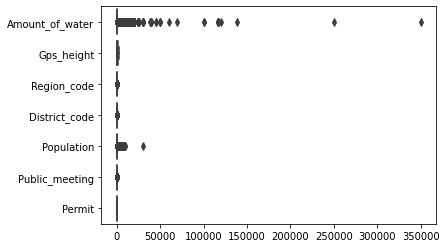

In [66]:
# boxplot

sns.boxplot(data=water_point_train_copy,orient='h')
plt.show()

In [ ]:
# There appears outliers in Amount of water but more than 50% of the data has value 0. 
# The units for Amount_of_water are not known hence it is left as it is.

In [67]:
# To convert region code, district code to one-hot encoded columns, we will first convert them to categorical, then do onehot encoding.
# Convert Region code and District code into categorical
water_point_train_copy['Region_code'] = water_point_train_copy['Region_code'].astype('category')
water_point_train_copy['District_code'] = water_point_train_copy['District_code'].astype('category')

In [68]:
# Other Categorical data columns
cat_attributes_train = water_point_train_copy.dtypes[water_point_train_copy.dtypes=='object'].index

## Numeric Data
num_attributes_train = water_point_train_copy.columns.difference(cat_attributes_train)

In [69]:
## Convert all the Categorical data column variables into categorical type
water_point_train_copy[cat_attributes_train] = water_point_train_copy[cat_attributes_train].apply(lambda x: x.astype('category'))


In [70]:
water_point_train_copy.dtypes

Amount_of_water           float32
Gps_height                  int16
Basin_name               category
Region_code              category
District_code            category
Population                  int16
Public_meeting           category
Permit                   category
Management_group         category
Extraction_type_class    category
Payment                  category
Water_quality            category
Quantity                 category
Source_type              category
Waterpoint_type_group    category
Status                   category
dtype: object

In [71]:
# Convert Region code and District code into categorical
water_point_test_copy['Region_code'] = water_point_test_copy['Region_code'].astype('category')
water_point_test_copy['District_code'] = water_point_test_copy['District_code'].astype('category')

# Other Categorical data columns
cat_attributes_test = water_point_test_copy.dtypes[water_point_test_copy.dtypes=='object'].index

## Numeric Data
num_attributes_test = water_point_test_copy.columns.difference(cat_attributes_test)

## Convert all the Categorical data column variables into categorical type
water_point_test_copy[cat_attributes_test] = water_point_test_copy[cat_attributes_test].apply(lambda x: x.astype('category'))


In [72]:
water_point_test_copy.dtypes

Amount_of_water           float32
Gps_height                  int16
Basin_name               category
Region_code              category
District_code            category
Population                  int16
Public_meeting           category
Permit                   category
Management_group         category
Extraction_type_class    category
Payment                  category
Water_quality            category
Quantity                 category
Source_type              category
Waterpoint_type_group    category
dtype: object

<AxesSubplot:>

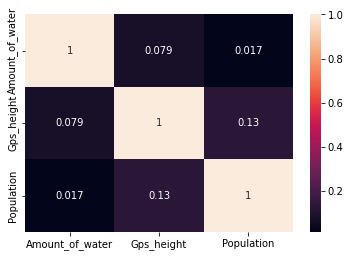

In [73]:
# heatmap of correlations

Var_Corr = water_point_train_copy.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

# no correlations are observed among the numerical predictor variables

In [ ]:
### missing value handling

In [74]:
# Function to calculate missing values by column 

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [75]:
missing_values = missing_values_table(water_point_train_copy)
missing_values.head(20)

Your selected dataframe has 16 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Public_meeting,2525,5.7
Permit,2226,5.1


In [76]:
missing_values = missing_values_table(water_point_test_copy)
missing_values.head(20)

Your selected dataframe has 15 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Public_meeting,653,5.9
Permit,529,4.8


In [ ]:
# the missing values are observed in 2 columns in both the train, test datasets.
# The % of misssing values is not high and can be imputed using 'mode' as both columns are categorical features.

In [77]:
# Features , target separation
X = water_point_train_copy[water_point_train_copy.columns.difference(['Status'])]  
y = water_point_train_copy['Status']

In [78]:
# imputing by mode for 'Public meeting' column
null_index_train = water_point_train_copy.loc[water_point_train_copy["Public_meeting"].isnull()].index
null_index_test = water_point_test_copy.loc[water_point_test_copy["Public_meeting"].isnull()].index

X.loc[null_index_train, 'Public_meeting'] = X['Public_meeting'].mode().iloc[0]
water_point_test_copy.loc[null_index_test,'Public_meeting'] = water_point_test_copy['Public_meeting'].mode().iloc[0]

In [79]:
# imputing by mode for 'Permit' column
null_index_train = water_point_train_copy.loc[water_point_train_copy["Permit"].isnull()].index
null_index_test = water_point_test_copy.loc[water_point_test_copy["Permit"].isnull()].index

X.loc[null_index_train, 'Permit'] = X['Permit'].mode().iloc[0]
water_point_test_copy.loc[null_index_test,'Permit'] = water_point_test_copy['Permit'].mode().iloc[0]

In [80]:
# after imputation, once again cross checking for null values
X.loc[null_index_train] 

,Amount_of_water,Basin_name,District_code,Extraction_type_class,Gps_height,Management_group,Payment,Permit,Population,Public_meeting,Quantity,Region_code,Source_type,Water_quality,Waterpoint_type_group
11,0.0,basin2,4,gravity,0,user-group,never pay,True,0,True,enough,12,spring,soft,communal standpipe
105,0.0,basin2,4,gravity,0,commercial,unknown,True,0,True,enough,12,river/lake,soft,communal standpipe
168,0.0,basin1,6,gravity,639,parastatal,never pay,True,75,True,seasonal,2,rainwater harvesting,soft,communal standpipe
194,0.0,basin5,2,handpump,1580,user-group,never pay,True,800,True,enough,20,shallow well,salty,hand pump
209,0.0,basin1,2,other,1539,user-group,unknown,True,1,True,dry,13,shallow well,unknown,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43969,0.0,basin1,2,handpump,1629,user-group,unknown,True,1,True,dry,13,shallow well,unknown,other
44022,0.0,basin1,2,motorpump,1583,user-group,unknown,True,1,True,dry,13,borehole,unknown,communal standpipe
44033,0.0,basin1,2,other,1417,user-group,never pay,True,442,True,insufficient,13,rainwater harvesting,soft,communal standpipe
44047,0.0,basin5,2,handpump,1226,other,other,True,600,True,insufficient,20,borehole,salty,hand pump


In [81]:
# after imputation, once again cross checking for null values
water_point_test_copy.loc[null_index_test]

,Amount_of_water,Gps_height,Basin_name,Region_code,District_code,Population,Public_meeting,Permit,Management_group,Extraction_type_class,Payment,Water_quality,Quantity,Source_type,Waterpoint_type_group
13,50.0,1514,basin1,13,2,1,True,True,user-group,submersible,pay per bucket,soft,insufficient,borehole,communal standpipe
26,0.0,1334,basin6,2,3,1,False,True,user-group,other,never pay,soft,enough,borehole,other
33,0.0,1613,basin1,13,2,1,True,True,user-group,other,unknown,unknown,dry,shallow well,other
93,0.0,1636,basin1,13,2,1,True,True,user-group,submersible,unknown,unknown,unknown,borehole,communal standpipe
101,0.0,0,basin2,12,4,0,True,True,user-group,gravity,never pay,soft,enough,spring,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10900,0.0,0,basin2,12,4,0,True,True,parastatal,gravity,unknown,soft,enough,spring,communal standpipe
10905,0.0,1594,basin5,20,2,90,False,True,commercial,rope pump,never pay,soft,seasonal,shallow well,hand pump
10906,0.0,0,basin2,12,4,0,True,True,user-group,gravity,unknown,soft,enough,spring,communal standpipe
10936,0.0,1218,basin5,20,2,120,True,True,commercial,rope pump,never pay,salty,insufficient,shallow well,hand pump


In [82]:
# after imputation, once again checking for null values
X.isnull().sum()

Amount_of_water          0
Basin_name               0
District_code            0
Extraction_type_class    0
Gps_height               0
Management_group         0
Payment                  0
Permit                   0
Population               0
Public_meeting           0
Quantity                 0
Region_code              0
Source_type              0
Water_quality            0
Waterpoint_type_group    0
dtype: int64

In [83]:
# after imputation, once again checking for null values
water_point_test_copy.isnull().sum()

Amount_of_water          0
Gps_height               0
Basin_name               0
Region_code              0
District_code            0
Population               0
Public_meeting           0
Permit                   0
Management_group         0
Extraction_type_class    0
Payment                  0
Water_quality            0
Quantity                 0
Source_type              0
Waterpoint_type_group    0
dtype: int64

## Model building data preparation

In [ ]:
# Given Train dataset is split as Train, Validation(test) data into 70:30.
# After ensuring the model performance on validation data, model fit on actual test data to be done.

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (30842, 15)
y_train (30842,)
X_test (13219, 15)
y_test (13219,)


In [86]:
# one hot encoding of categorical features using pandas

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


In [88]:
water_point_test_copy = pd.get_dummies(water_point_test_copy)
X_train, water_point_test_copy = X_train.align(water_point_test_copy, join='inner', axis=1)

In [89]:
water_point_test_copy.shape

(11015, 106)

In [90]:
X_train.shape

(30842, 106)

In [91]:
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

In [92]:
X_train.shape

(30842, 106)

In [93]:
X_test.shape

(13219, 106)

In [94]:
X_train.columns.difference(X_test.columns)

Index([], dtype='object')

In [95]:
print(X_train.dtypes)
print(water_point_test_copy.dtypes)

Amount_of_water                             float32
Gps_height                                    int16
Population                                    int16
Basin_name_basin1                             uint8
Basin_name_basin2                             uint8
                                             ...   
Waterpoint_type_group_cattle trough           uint8
Waterpoint_type_group_communal standpipe      uint8
Waterpoint_type_group_hand pump               uint8
Waterpoint_type_group_improved spring         uint8
Waterpoint_type_group_other                   uint8
Length: 106, dtype: object
Amount_of_water                             float32
Gps_height                                    int16
Population                                    int16
Basin_name_basin1                             uint8
Basin_name_basin2                             uint8
                                             ...   
Waterpoint_type_group_cattle trough           uint8
Waterpoint_type_group_communal standp

## 1. Logistic Regression Model

In [96]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [97]:
CV_accuracy = cross_val_score(lr, X_train, y_train, cv=5, scoring = 'accuracy')
CV_aucroc_score = cross_val_score(lr, X_train, y_train, cv=5, scoring = 'roc_auc')

print('CV Accuracy:',np.mean(CV_accuracy))
print('CV roc_auc score:',np.mean(CV_aucroc_score))

CV Accuracy: 0.765676621675803
CV roc_auc score: 0.8152057909200249


In [99]:
y_pred_test = lr.predict(X_test)
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(lr.score(X_test, y_test)))


Accuracy of logistic regression classifier on validation set: 0.77


In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))


                precision    recall  f1-score   support

    functional       0.75      0.91      0.82      7846
non functional       0.81      0.57      0.67      5373

      accuracy                           0.77     13219
     macro avg       0.78      0.74      0.75     13219
  weighted avg       0.78      0.77      0.76     13219



## 2. Random Forest Model

In [129]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [130]:
y_pred_test_rf = rf.predict(X_test)


In [131]:
y_pred_train_rf = rf.predict(X_train)

In [132]:
print ("Train Accuracy: " ,accuracy_score(y_pred_train_rf, y_train)) 
print ("Test Accuracy: " ,accuracy_score(y_pred_test_rf, y_test))

Train Accuracy:  0.956714869334025
Test Accuracy:  0.8294122096981618


In [ ]:
# accuracy improved from Logistic regression, will now try hyperparameter tuning for RF model.  

## 3. Grid search Random Forest

In [133]:
from sklearn.model_selection import GridSearchCV
#from sklearn import tree
dt = RandomForestClassifier(oob_score = True, random_state=100)
param_grid = {'n_estimators' : [100,300,500], #'max_leaf_nodes': np.arange(5,30,1),
             'min_samples_split': np.arange(10,60,10),
             'max_depth':np.arange(5,50,5)
             }
rsearch = GridSearchCV(estimator=dt, param_grid=param_grid, scoring = 'accuracy') 
rsearch.fit(X_train, y_train)

print(rsearch.best_estimator_)
print('Validation Accuracy',rsearch.score(X_test, y_test))
print('Train Accuracy',rsearch.score(X_train, y_train))

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=300,
                       oob_score=True, random_state=100)
Validation Accuracy 0.8368257810726983
Train Accuracy 0.8928085078788665


In [134]:
y_pred_test_rf = rsearch.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_test_rf))

                precision    recall  f1-score   support

    functional       0.83      0.91      0.87      7846
non functional       0.85      0.73      0.78      5373

      accuracy                           0.84     13219
     macro avg       0.84      0.82      0.83     13219
  weighted avg       0.84      0.84      0.83     13219



In [ ]:
# accuracy increased slightly to 83.6%. The best RF model is:
# RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=300,
#                      oob_score=True, random_state=100)

# will try XGboost now.

## 4. XGBoost 

In [130]:
from xgboost import XGBClassifier

modelxg = XGBClassifier(seed=123)

param_grid = {'learning_rate': np.arange(0.05,0.2,0.05),
              'n_estimators':[100,300],
              'max_depth': np.arange(2,10,2),
        'subsample': np.arange(0.3,1,0.3),
         'colsample_bytree': [0.1,0.2,0.3] }
 
gsearch = GridSearchCV(estimator=modelxg, param_grid=param_grid, scoring = 'accuracy') 
gsearch.fit(X_train, y_train)
print(gsearch.best_score_)
print(gsearch.best_estimator_)
print('Validation Accuracy',gsearch.score(X_test, y_test))
print('Train Accuracy',gsearch.score(X_train, y_train))



[13:02:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:05:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:05:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:07:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:07:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:07:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:11:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:11:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:12:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:12:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:14:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:14:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:14:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:16:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:20:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:20:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:20:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:22:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:55:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:56:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:56:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:56:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:58:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:58:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:58:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:00:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:00:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:00:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:01:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:03:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:03:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:03:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:03:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:04:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:04:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:04:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:05:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:09:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:12:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:12:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:12:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:14:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:16:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:20:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:25:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:27:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:30:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:35:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:36:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:39:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:44:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:44:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:44:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:46:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:46:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:46:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:48:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:49:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:51:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:55:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:08:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:15:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:15:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:16:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:16:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:21:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:21:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:23:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:26:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:26:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:26:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:29:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [136]:
y_pred_test_xgboost = gsearch.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_test_xgboost))

                precision    recall  f1-score   support

    functional       0.83      0.91      0.87      7846
non functional       0.84      0.73      0.78      5373

      accuracy                           0.84     13219
     macro avg       0.84      0.82      0.83     13219
  weighted avg       0.84      0.84      0.83     13219



In [138]:
print('xgboost accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred_test_xgboost)))
print('xgboost accuracy: {:.3f}'.format(accuracy_score(y_train, gsearch.best_estimator_.predict(X_train))))

xgboost accuracy: 0.835
xgboost accuracy: 0.888


## Predictions on Test dataset

In [ ]:
# As Random forest model giving the best validation accuracy scores, and comparatively taking less training time than XGBoost,
# RF model is used for predictions on test data.
# Also, feature importance to be  obtained from RF model.

In [139]:
# Random Forest
# feature importance 

df_features = pd.DataFrame((rsearch.best_estimator_.feature_importances_), columns = ['imp'], 
                           index = (X_train.columns))

df_features.sort_values('imp', ascending=False)

,imp
Quantity_dry,0.146901
Gps_height,0.083759
Waterpoint_type_group_other,0.061280
Population,0.052349
Quantity_enough,0.049283
...,...
District_code_62,0.000225
District_code_0,0.000209
Water_quality_fluoride abandoned,0.000109
District_code_80,0.000040


In [140]:
df_features.sort_values('imp', ascending=False)[:25]

,imp
Quantity_dry,0.146901
Gps_height,0.083759
Waterpoint_type_group_other,0.061280
Population,0.052349
Quantity_enough,0.049283
Extraction_type_class_other,0.046737
Amount_of_water,0.041734
Payment_never pay,0.021499
Quantity_insufficient,0.021032
Extraction_type_class_gravity,0.015342


In [141]:
cumulative_importances = np.cumsum(df_features)
print('Number of features for 75% importance:', np.where(cumulative_importances > 0.75)[0][0] + 1)

Number of features for 75% importance: 62


In [145]:
# prediction on actual test data are stored in a file

# predictions on actual test data
y_pred_actual_test_rf = rsearch.best_estimator_.predict(water_point_test_copy)

# saving predictions as a dataframe and storing as a csv file
predictions = pd.DataFrame()
predictions['Id'] = water_point_test['Id']
predictions['Status'] = y_pred_actual_test_rf
predictions.to_csv("waterpoint_predictions.csv",index = False)

In [146]:
predictions

,Id,Status
0,31547,non functional
1,34980,non functional
2,54744,functional
3,20884,non functional
4,42440,functional
...,...,...
11010,50818,functional
11011,58478,functional
11012,51919,functional
11013,4475,non functional


## The most important features in predicting the water point functionality are:
Quantity  
Gps_Height  
Water_point_type_group  
Population  
Extraction_type  
Amount_of_water  
Payment  